<img src="qutip_image.png" height="200">

<img src="supporting.png" height="300">

<img src="developers.png">

* Python library for simulating open quantum systems 
* It can be used for quantum circuit simulations
* Uses Cython to compile and run C/C++ code.

In [1]:
# Importing necessary modules
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
# Magic command to plot images inline
%matplotlib inline

# Quantum object class: qobj

* ```Qobj``` is the class used for representing any quantum object such as states and operators 
* Contains all the information required to describe a quantum system, such as its matrix representation, composite structure and dimensionality
* Define qubits in computational basis (|0>, |1>) and combine them to form |+> and |->

In [2]:
q0 = Qobj([[1], [0]])
q0

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]]

In [3]:
q1 = Qobj([[0], [1]])
q1

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.]
 [ 1.]]

In [4]:
h0 = (q0 + q1)/np.sqrt(2)
h0

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.70710678]
 [ 0.70710678]]

In [5]:
h1 = (q0 - q1)/np.sqrt(2)
h1

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]]

The Pauli X gate and the Hadamard gate H is already defined

In [6]:
X = sigmax()
X

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  1.]
 [ 1.  0.]]

In [7]:
H = hadamard_transform(N=1)
H

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

* Apply the gates X to q0 and q1
* Apply the Hadamard gate to q0 to get the |+> state

In [8]:
X*q0

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.]
 [ 1.]]

In [9]:
X*q1

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]]

In [10]:
H*q0

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.70710678]
 [ 0.70710678]]

In [11]:
H*q1

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]]

* You can compare two states easily or check properties of the ```Qobj```

In [12]:
print(h0 == H*q0)
print(h1 == H*q1)

True
True


# Tensor products of ```Qobj```
* You can also write tensor products easily with the ```tensor()``` function.
* Define a maximally entangled Bell state

In [14]:
bell0 = tensor(q0, q0)
bell0

Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

* Define a tensor product of two operators H, X and apply it to the bell state

In [15]:
HX = tensor(H, X)
HX*bell0

Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
Qobj data =
[[ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.70710678]]

# Quantum circuits

* Gates and representation

## CNOT

In [16]:
CNOT = cnot()
CNOT

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]]

# TOFFOLI

In [22]:
toffoli()

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]]

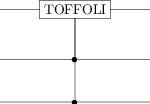

In [21]:
Image(filename='toffoli.png')

## Defining a quantum circuit

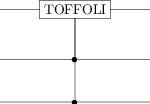

In [26]:
q = QubitCircuit(3, reverse_states=False)
q.add_gate("TOFFOLI", controls=[0, 2], targets=[1])
Image("toffoli.png")

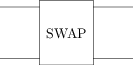

In [27]:
N = 2
qc0 = QubitCircuit(N)
qc0.add_gate("SWAP", [0, 1], None)
Image("swap.png")

Convert the gate 

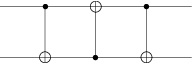

In [33]:
qc2 = qc0.resolve_gates("CNOT")
Image("qc2.png")

In [34]:
U_list0 = qc0.propagators()
U0 = gate_sequence_product(U_list0)
U0

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]]

In [35]:
qc1 = QubitCircuit(N)
qc1.add_gate("CNOT", 0, 1)
qc1.add_gate("CNOT", 1, 0)
qc1.add_gate("CNOT", 0, 1)